In [14]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPool2D,Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [15]:
def cnn_architecture(optimiser_algo='adam',loss_fn='binary_crossentropy',data_metrics=['accuracy']):
    classifier=Sequential()
    # convolution layer - 32 feature detectors of 3x3 shape plus a rectifier on top of our convolved feature map
    # 32,(3,3) means 32 filters means matrix of 3*3 we do at convolution
    # input_shape helps to take all images in a common dimesnion though they are differnet shapes (1028*23) 0r (723*512) 
    # as we have RGB values to color images so that shape we are taking 64*64*3
    classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
    #max pooing layer of 2*2 shape  
    classifier.add(MaxPool2D(pool_size=(2,2)))
    # we can add flatten layer but in real time we do need convolution layer 
    classifier.add(Conv2D(32,(3,3),activation='relu'))
    #max pooing layer of 2*2 shape  
    classifier.add(MaxPool2D(pool_size=(2,2)))

    #adding flatten layer 
    classifier.add(Flatten())

    # adding full connecting layer
    #units values is some thing we need to experiment with 
    classifier.add(Dense(units=128,activation='relu'))

    #output layer
    classifier.add(Dense(units=1,activation="sigmoid"))
    #loss functions if we have binary "binary_crossentropy"
    # if not binary crossentropy if we use crossentropy
    classifier.compile(optimizer=optimiser_algo,loss=loss_fn,metrics=data_metrics)
    return classifier

In [16]:
def train_test_datagen(train_dir,test_dir):
    train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
    test_datagen=ImageDataGenerator(rescale=1./255)
    training_set=train_datagen.flow_from_directory(train_dir,
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')
    testing_set=test_datagen.flow_from_directory(test_dir,
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
    return training_set,testing_set

In [20]:
def check_point_creation(filepath):
    from keras.callbacks import ModelCheckpoint
    filepath=filepath+"/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
    checkpoint=ModelCheckpoint(filepath=filepath,verbose=1,save_best_only=True,mode='min')
    callback_list=[checkpoint]
    return callback_list

In [62]:
#calling the methods to execute 
classifier_compile=cnn_architecture()
training_set,testing_set=train_test_datagen(train_dir="dataset/train",test_dir="dataset/test")

callback_list=check_point_creation("cats_vs_dogs_savedmodel/")
classifier_compile.fit_generator(generator=training_set,steps_per_epoch=100,
                        epochs=100,verbose=1,
                         validation_data=testing_set,
                         validation_steps=4,
                        callbacks=callback_list)

Found 8008 images belonging to 2 classes.
Found 2004 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6970 - acc: 0.5134 - val_loss: 0.7113 - val_acc: 0.4609

Epoch 00001: val_loss improved from inf to 0.71125, saving model to cats_vs_dogs_savedmodel//weights-improvement-01-0.6970.hdf5
Epoch 2/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6774 - acc: 0.5625 - val_loss: 0.6455 - val_acc: 0.5781

Epoch 00002: val_loss improved from 0.71125 to 0.64555, saving model to cats_vs_dogs_savedmodel//weights-improvement-02-0.6774.hdf5
Epoch 3/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6355 - acc: 0.6413 - val_loss: 0.6478 - val_acc: 0.6562

Epoch 00003: val_loss did not improve from 0.64555
Epoch 4/100
100/100 [==============================] - 26s 256ms/step - loss: 0.6056 - acc: 0.6741 - val_loss: 0.6133 - val_acc: 0.6406

Epoch 00004: val_loss improved from 0.64555 to 0.61335, s

100/100 [==============================] - 28s 283ms/step - loss: 0.3646 - acc: 0.8350 - val_loss: 0.4752 - val_acc: 0.7734

Epoch 00039: val_loss did not improve from 0.36466
Epoch 40/100
100/100 [==============================] - 30s 301ms/step - loss: 0.3705 - acc: 0.8347 - val_loss: 0.3979 - val_acc: 0.8281

Epoch 00040: val_loss did not improve from 0.36466
Epoch 41/100
100/100 [==============================] - 26s 257ms/step - loss: 0.3840 - acc: 0.8238 - val_loss: 0.4800 - val_acc: 0.8047

Epoch 00041: val_loss did not improve from 0.36466
Epoch 42/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3533 - acc: 0.8397 - val_loss: 0.4419 - val_acc: 0.7344

Epoch 00042: val_loss did not improve from 0.36466
Epoch 43/100
100/100 [==============================] - 25s 254ms/step - loss: 0.3559 - acc: 0.8409 - val_loss: 0.4643 - val_acc: 0.7969

Epoch 00043: val_loss did not improve from 0.36466
Epoch 44/100
100/100 [==============================] - 26s 256ms/st

100/100 [==============================] - 28s 281ms/step - loss: 0.2095 - acc: 0.9134 - val_loss: 0.8381 - val_acc: 0.7812

Epoch 00082: val_loss did not improve from 0.34200
Epoch 83/100
100/100 [==============================] - 30s 301ms/step - loss: 0.2199 - acc: 0.9109 - val_loss: 0.3151 - val_acc: 0.8906

Epoch 00083: val_loss improved from 0.34200 to 0.31515, saving model to cats_vs_dogs_savedmodel//weights-improvement-83-0.2204.hdf5
Epoch 84/100
100/100 [==============================] - 28s 284ms/step - loss: 0.2113 - acc: 0.9141 - val_loss: 0.5358 - val_acc: 0.7969

Epoch 00084: val_loss did not improve from 0.31515
Epoch 85/100
100/100 [==============================] - 28s 282ms/step - loss: 0.2113 - acc: 0.9072 - val_loss: 0.5846 - val_acc: 0.8047

Epoch 00085: val_loss did not improve from 0.31515
Epoch 86/100
100/100 [==============================] - 27s 275ms/step - loss: 0.2048 - acc: 0.9144 - val_loss: 0.6231 - val_acc: 0.7812

Epoch 00086: val_loss did not improve 

In [63]:
#classifier_compile.predict_classes
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [64]:
#predicting the image 
# lets see on another image
def test_single_prediction(filename):
    test_image=image.load_img(filename,target_size=(64,64))
    #convert in to an 3D Array
    test_image=image.img_to_array(test_image)
    test_image.shape
    # our cnn model assigned batch size as dimesnion  so for that we are expanding its dimension
    test_image=np.expand_dims(test_image,axis=0)
    
    result=classifier_compile.predict(test_image)
    print(result)
    for key,value in training_set.class_indices.items():
        if value==result[0][0]:
            return key

    return "Not predicted"

In [71]:
predict_image='predict/test4.jpg'
predict=test_single_prediction(predict_image)
predict

[[1.]]


'dogs'

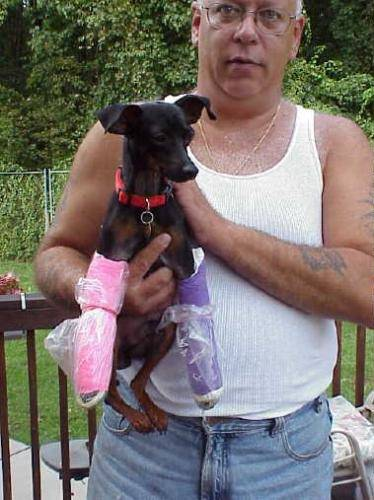

In [72]:
#displaying image
from IPython.display import Image
Image(filename=predict_image)